### **Predicting Cancer Mortality Rates for US Counties**

Data source - https://data.world/nrippner/ols-regression-challenge

**Creating a mount point in Google drive for reading files into google colab directly**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Data Description**

TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)

avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)

avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)

incidenceRate: Mean per capita (100,000) cancer diagoses(a)

medianIncome: Median income per county (b)

popEst2015: Population of county (b)

povertyPercent: Percent of populace in poverty (b)

studyPerCap: Per capita number of cancer-related clinical trials per county (a)

binnedInc: Median income per capita binned by decile (b)

MedianAge: Median age of county residents (b)

MedianAgeMale: Median age of male county residents (b)

MedianAgeFemale: Median age of female county residents (b)

Geography: County name (b)

AvgHouseholdSize: Mean household size of county (b)

PercentMarried: Percent of county residents who are married (b)

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b)

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)

PctPrivateCoverage: Percent of county residents with private health coverage (b)

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)

PctPublicCoverage: Percent of county residents with government-provided health coverage (b)

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)

PctWhite: Percent of county residents who identify as White (b)

PctBlack: Percent of county residents who identify as Black (b)

PctAsian: Percent of county residents who identify as Asian (b)

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b)

PctMarriedHouseholds: Percent of married households (b)

BirthRate: Number of live births relative to number of women in county (b)

(a): years 2010-2016

(b): 2013 Census Estimates


## **Data Understanding**




**Importing the packages required for analysis**




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor 
from sklearn import linear_model
from sklearn import tree
from sklearn.metrics import *
import graphviz 
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings("ignore") 

In [3]:
# Reading the dataset and storing it in a separate dataframe
df_cancer  = pd.read_csv('/content/drive/My Drive/IE7275_Data_Mining_in_Engineering/Project_Files/cancer_reg.csv', encoding='latin-1')

In [4]:
# Setting the maximum number of rows displayed to 500
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

Finding the dimensions of the dataset before further analysis

In [5]:
# Checking the dimensions of the dataset  
print("Dimensions of the dataset :",df_cancer.shape)

# Reading the first five observations of the dataset 
df_cancer.head()

Dimensions of the dataset : (3047, 34)


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


The dataset comprises both numeric and categorical variables

In [6]:
# Analyzing the datatypes of each attribute of the dataset
df_cancer.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          


## **Data Pre-processing**

In [7]:
# Computing the percentage of missing values for each attribute of the dataset

print(round(100*(df_cancer.isnull().sum()/len(df_cancer))),2)

avgAnnCount                 0.0
avgDeathsPerYear            0.0
TARGET_deathRate            0.0
incidenceRate               0.0
medIncome                   0.0
popEst2015                  0.0
povertyPercent              0.0
studyPerCap                 0.0
binnedInc                   0.0
MedianAge                   0.0
MedianAgeMale               0.0
MedianAgeFemale             0.0
Geography                   0.0
AvgHouseholdSize            0.0
PercentMarried              0.0
PctNoHS18_24                0.0
PctHS18_24                  0.0
PctSomeCol18_24            75.0
PctBachDeg18_24             0.0
PctHS25_Over                0.0
PctBachDeg25_Over           0.0
PctEmployed16_Over          5.0
PctUnemployed16_Over        0.0
PctPrivateCoverage          0.0
PctPrivateCoverageAlone    20.0
PctEmpPrivCoverage          0.0
PctPublicCoverage           0.0
PctPublicCoverageAlone      0.0
PctWhite                    0.0
PctBlack                    0.0
PctAsian                    0.0
PctOther

In [8]:
# Dropping the 'PctSomeCol18_24' variable as it has 75% missing data and 'PctPrivateCoverageAlone' as there will still be enough variables
df_cancer.drop(['PctSomeCol18_24', 'PctPrivateCoverageAlone','PctEmployed16_Over'], axis=1, inplace = True)

In [9]:
# Checking the dimensions of the dataset after removing missing values 
print("Dimensions of the dataset :",df_cancer.shape)

# Computing the percentage of missing values for each attribute of the dataset
print(round(100*(df_cancer.isnull().sum()/len(df_cancer))),2)

Dimensions of the dataset : (3047, 31)
avgAnnCount               0.0
avgDeathsPerYear          0.0
TARGET_deathRate          0.0
incidenceRate             0.0
medIncome                 0.0
popEst2015                0.0
povertyPercent            0.0
studyPerCap               0.0
binnedInc                 0.0
MedianAge                 0.0
MedianAgeMale             0.0
MedianAgeFemale           0.0
Geography                 0.0
AvgHouseholdSize          0.0
PercentMarried            0.0
PctNoHS18_24              0.0
PctHS18_24                0.0
PctBachDeg18_24           0.0
PctHS25_Over              0.0
PctBachDeg25_Over         0.0
PctUnemployed16_Over      0.0
PctPrivateCoverage        0.0
PctEmpPrivCoverage        0.0
PctPublicCoverage         0.0
PctPublicCoverageAlone    0.0
PctWhite                  0.0
PctBlack                  0.0
PctAsian                  0.0
PctOtherRace              0.0
PctMarriedHouseholds      0.0
BirthRate                 0.0
dtype: float64 2


In [10]:
# Checking the summary statistics 
df_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
avgAnnCount,3047.0,606.338544,1416.356223,6.000000,76.000000,171.000000,518.000000,3.815000e+04
avgDeathsPerYear,3047.0,185.965868,504.134286,3.000000,28.000000,61.000000,149.000000,1.401000e+04
TARGET_deathRate,3047.0,178.664063,27.751511,59.700000,161.200000,178.100000,195.200000,3.628000e+02
incidenceRate,3047.0,448.268586,54.560733,201.300000,420.300000,453.549422,480.850000,1.206900e+03
medIncome,3047.0,47063.281917,12040.090836,22640.000000,38882.500000,45207.000000,52492.000000,1.256350e+05
popEst2015,3047.0,102637.370528,329059.220504,827.000000,11684.000000,26643.000000,68671.000000,1.017029e+07
povertyPercent,3047.0,16.878175,6.409087,3.200000,12.150000,15.900000,20.400000,4.740000e+01
studyPerCap,3047.0,155.399415,529.628366,0.000000,0.000000,0.000000,83.650776,9.762309e+03
MedianAge,3047.0,45.272333,45.304480,22.300000,37.700000,41.000000,44.000000,6.240000e+02
MedianAgeMale,3047.0,39.570725,5.226017,22.400000,36.350000,39.600000,42.500000,6.470000e+01



## **Exploratory Data Analysis**

In [11]:
# Segregating the numeric and categorical variables 
df_cancer_categorical = []
df_cancer_numerical = []
for x in df_cancer.columns:
  if (df_cancer[x].dtypes == np.object):
    df_cancer_categorical.append(x)
  else:
    df_cancer_numerical.append(x)

print("Categorical columns :",df_cancer_categorical)
print("Numerical columns   :",df_cancer_numerical)

# Identifying the categorical variables present in the dataset

df_cat = df_cancer.loc[:,df_cancer_categorical]



# Computing the unique values of each of the categorical variables

for column in df_cat:
    print("\n",column,': \n',df_cancer[column].unique(), "\n\n")

Categorical columns : ['binnedInc', 'Geography']
Numerical columns   : ['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']

 binnedInc : 
 ['(61494.5, 125635]' '(48021.6, 51046.4]' '(42724.4, 45201]'
 '(51046.4, 54545.6]' '(37413.8, 40362.7]' '(40362.7, 42724.4]'
 '(54545.6, 61494.5]' '(34218.1, 37413.8]' '[22640, 34218.1]'
 '(45201, 48021.6]'] 



 Geography : 
 ['Kitsap County, Washington' 'Kittitas County, Washington'
 'Klickitat County, Washington' ... 'Ford County, Kansas'
 'Franklin County, Kansas' 'Geary County, Kansas'] 




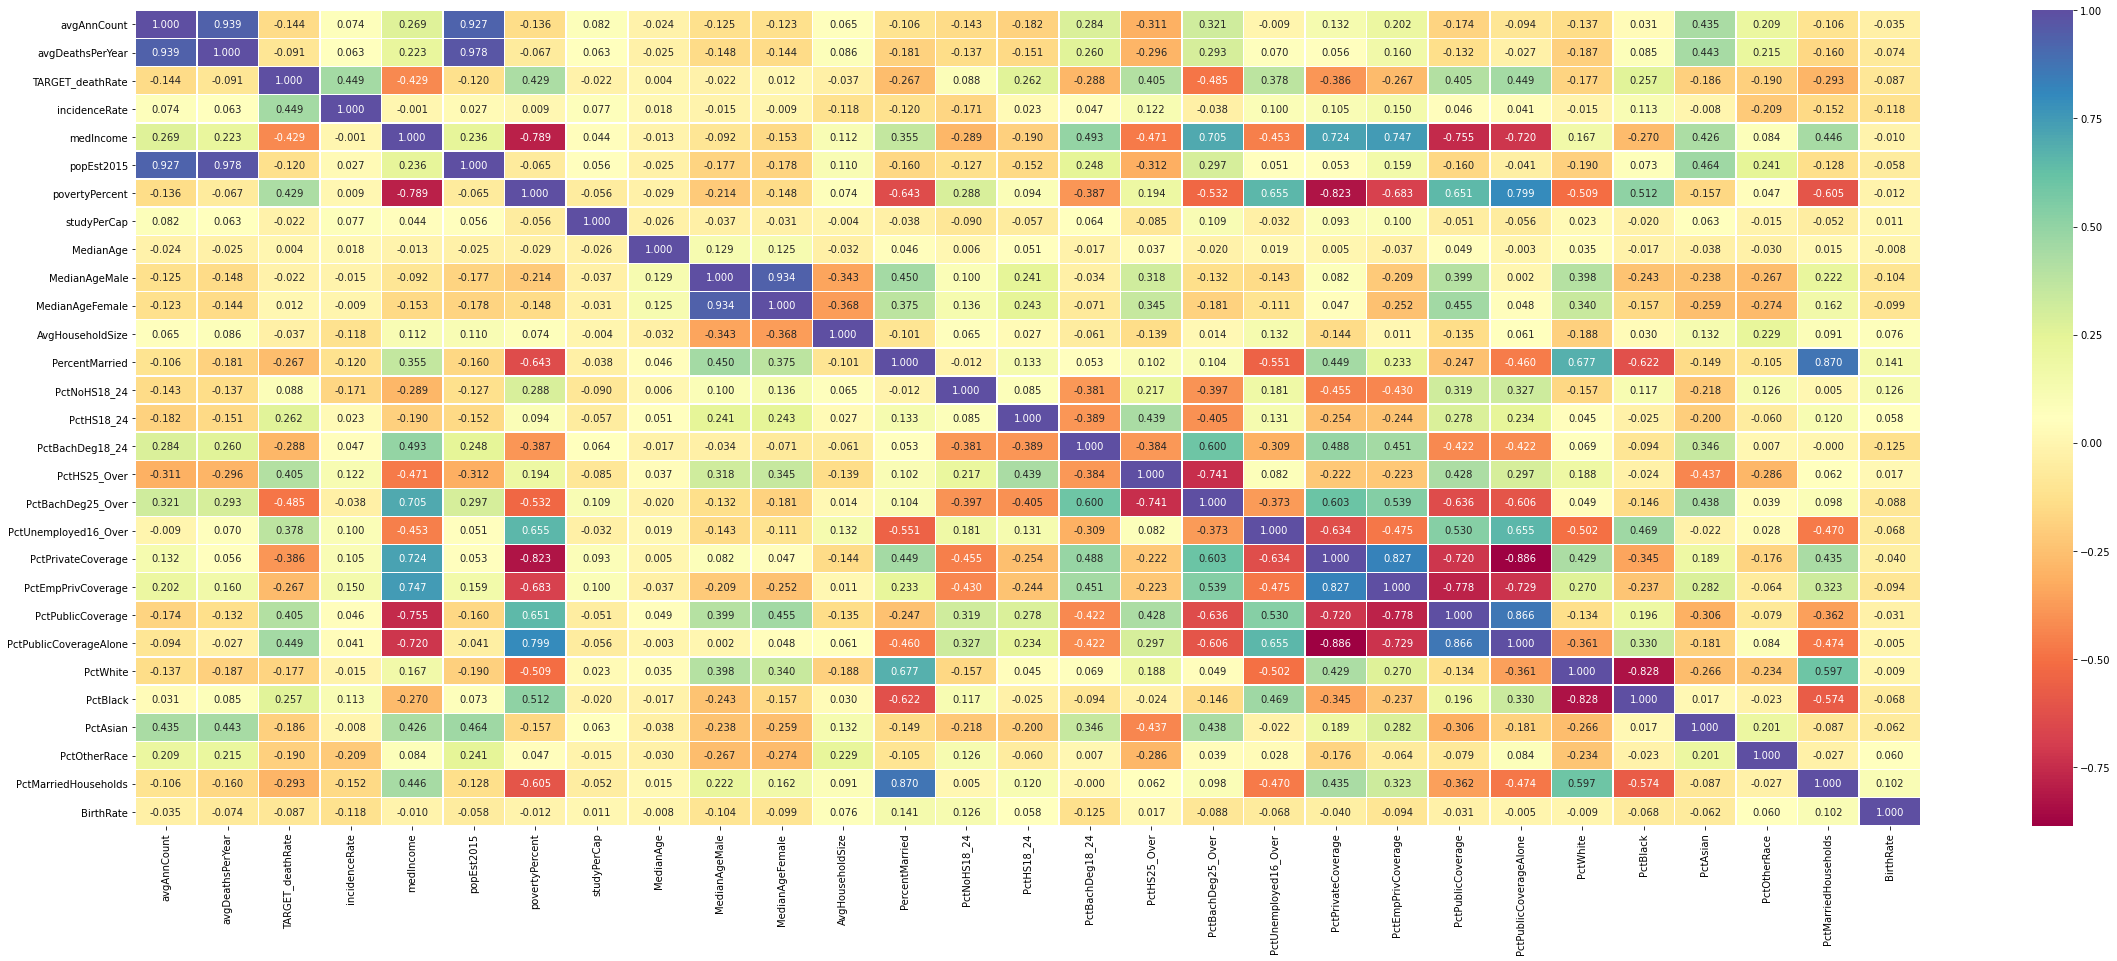

In [12]:
# Visualizing the correlation using a heatmap

plt.figure(figsize=(40,15))
sns.heatmap(df_cancer.loc[:,df_cancer_numerical].corr(), annot=True, linewidths=.5,fmt='.3f', cmap="Spectral")

In [13]:
#Checking the names of the numerical columns
df_cancer.loc[:,df_cancer_numerical].columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

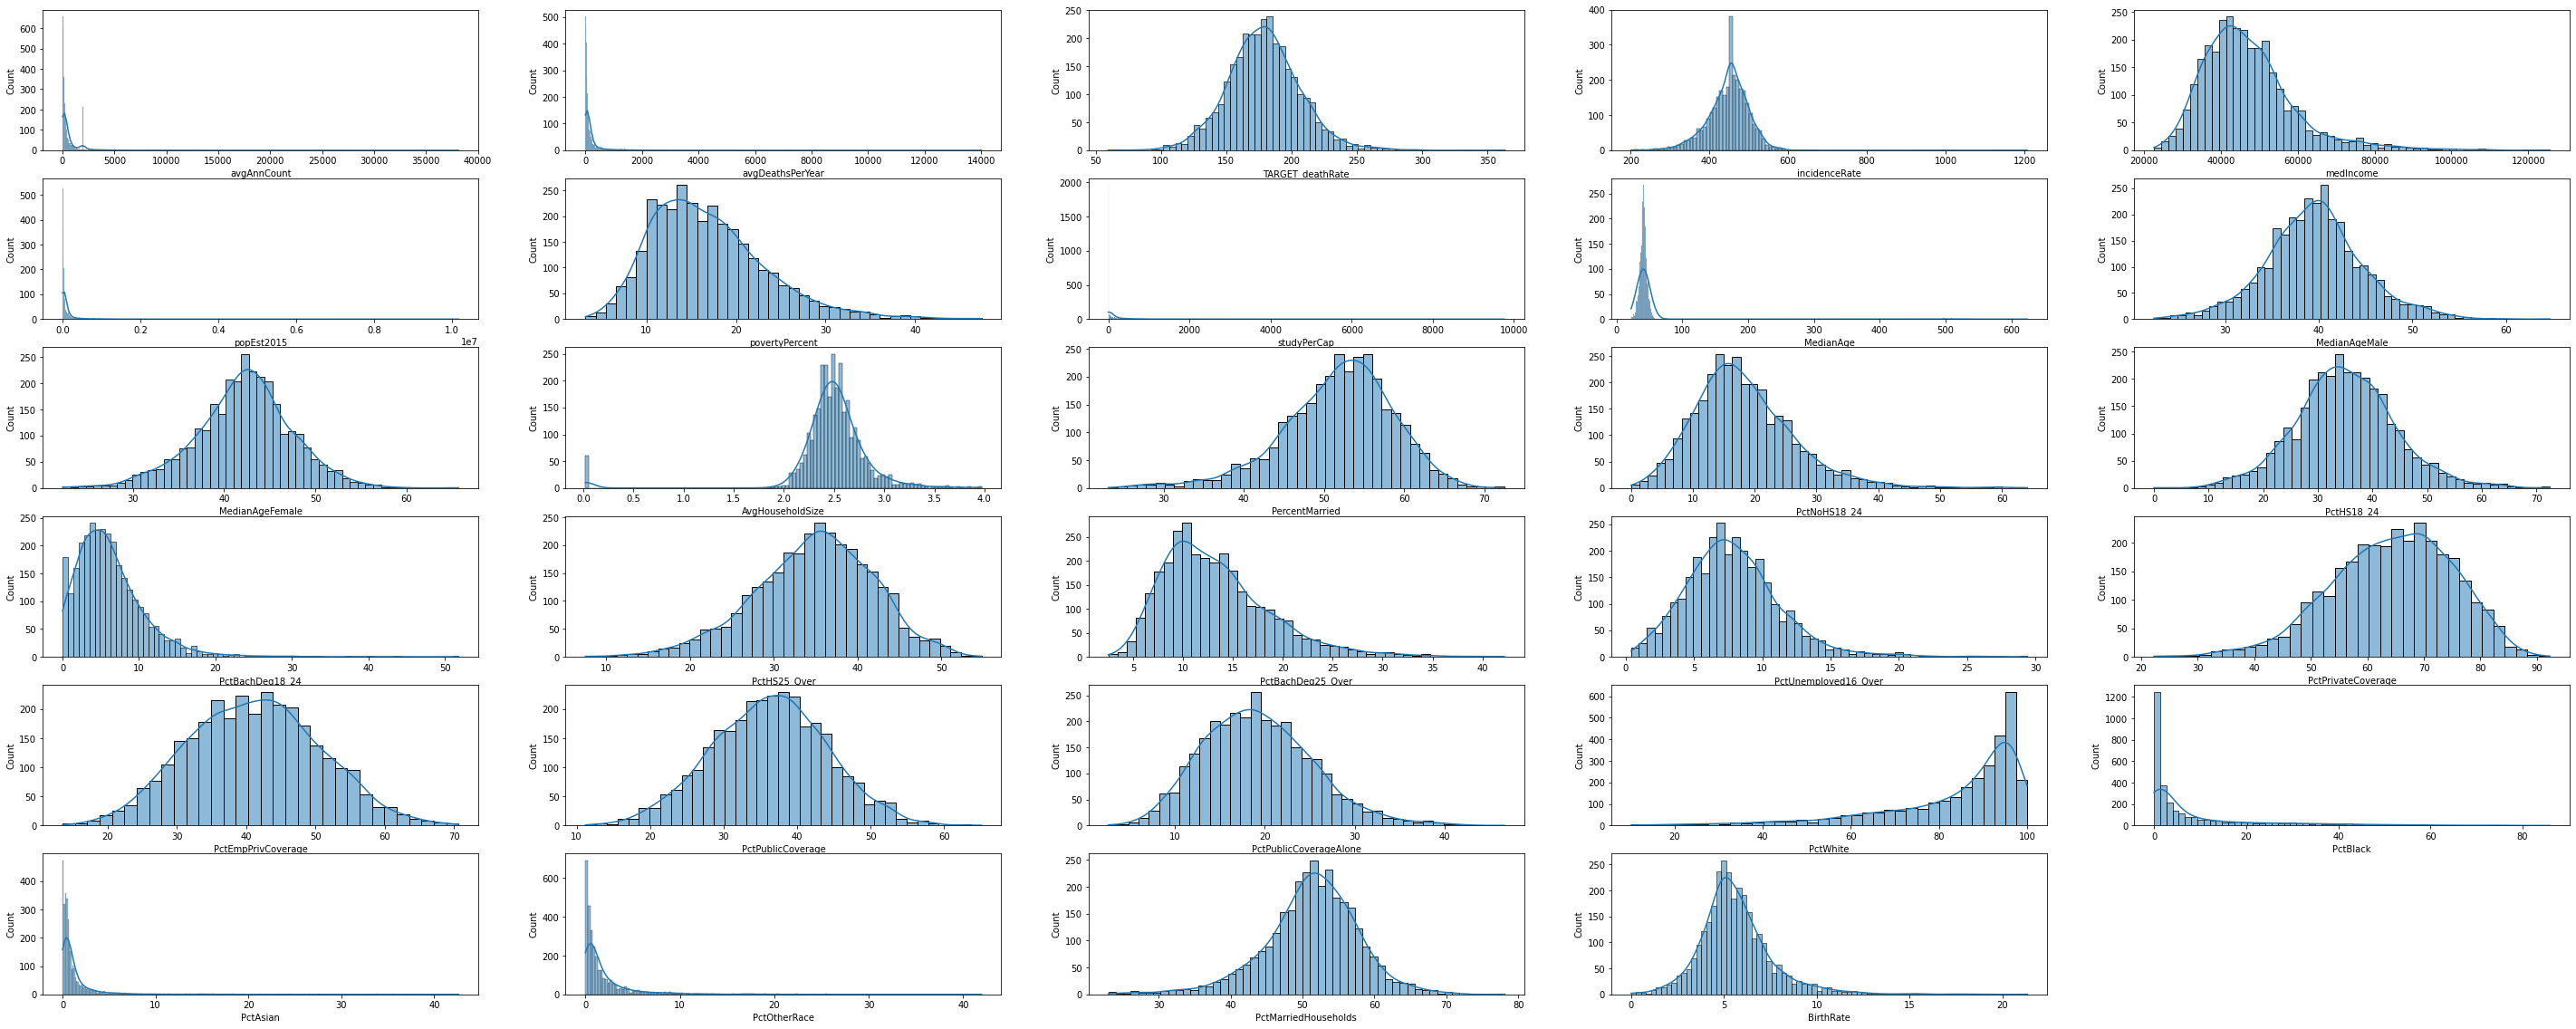

In [14]:
# Visualizing the distribution of the numerical variables
plt.figure(figsize=(50,20))
for i,num_col in enumerate(df_cancer_numerical):
  plt.subplot(6,5,i+1)
  sns.histplot(data=df_cancer,x=num_col,kde=True)

In [15]:
# Check for normal distribution using Anderson-Darling test ; if p-value>0.05 --> normally distributed
from statsmodels.stats.diagnostic import normal_ad
from scipy.stats import shapiro

for col in df_cancer_numerical:
  print(col, "--->",normal_ad(df_cancer[col]), "\n")

# Only 'PctPublicCoverage' is normally distributed since its p-value = 0.35 >0.05

avgAnnCount ---> (inf, 0.0) 

avgDeathsPerYear ---> (inf, 0.0) 

TARGET_deathRate ---> (4.074235993773982, 3.907538861588575e-10) 

incidenceRate ---> (inf, 0.0) 

medIncome ---> (47.28497328487447, 0.0) 

popEst2015 ---> (inf, 0.0) 

povertyPercent ---> (29.982090387904464, 0.0) 

studyPerCap ---> (inf, 0.0) 

MedianAge ---> (inf, 0.0) 

MedianAgeMale ---> (6.0144854802092595, 8.675364669700497e-15) 

MedianAgeFemale ---> (6.104847994156444, 5.284934284258141e-15) 

AvgHouseholdSize ---> (228.65841774237924, 0.0) 

PercentMarried ---> (14.444789801415027, 0.0) 

PctNoHS18_24 ---> (22.575356829347584, 0.0) 

PctHS18_24 ---> (2.970310136365697, 1.848363905431518e-07) 

PctBachDeg18_24 ---> (inf, 0.0) 

PctHS25_Over ---> (4.718596567822715, 1.0956709414583093e-11) 

PctBachDeg25_Over ---> (42.14776067998719, 0.0) 

PctUnemployed16_Over ---> (14.55890161048137, 0.0) 

PctPrivateCoverage ---> (6.215594118975787, 2.8801601344809057e-15) 

PctEmpPrivCoverage ---> (1.2933272030022636, 0.00233

In [16]:
#Dropping variables 'avgAnnCount','PctPrivateCoverage','PctWhite', 'PctMarriedHouseholds','PctPublicCoverageAlone' to tackle Multicollinearity
df_cancer.drop(['avgAnnCount','PctPrivateCoverage','PctWhite', 'PctMarriedHouseholds','PctPublicCoverageAlone'], axis=1, inplace=True)

In [17]:
# Checking the dimensions of the dataset  
print("Dimensions of the dataset :",df_cancer.shape)

# Reading the first five observations of the dataset 
df_cancer.head()

Dimensions of the dataset : (3047, 26)


,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctUnemployed16_Over,PctEmpPrivCoverage,PctPublicCoverage,PctBlack,PctAsian,PctOtherRace,BirthRate
0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,6.9,23.2,19.6,8.0,41.6,32.9,2.594728,4.821857,1.843479,6.118831
1,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,7.5,26.0,22.7,7.8,43.6,31.1,0.969102,2.246233,3.741352,4.333096
2,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,9.5,29.0,16.0,7.0,34.9,42.1,0.739673,0.465898,2.747358,3.729488
3,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,2.5,31.6,9.3,12.1,35.0,45.3,0.782626,1.161359,1.362643,4.603841
4,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,2.0,33.4,15.0,4.8,35.1,44.0,0.270192,0.665830,0.492135,6.796657



## **Model Building & Performance Evaluation**

In [18]:
# Using Label Encoder on the categorical data to convert them to numerical values for model training
from sklearn.preprocessing import LabelEncoder

df_cancer['binnedInc'] = LabelEncoder().fit_transform(df_cancer['binnedInc'])
df_cancer['Geography'] = LabelEncoder().fit_transform(df_cancer['Geography'])

In [19]:
df_cancer.head()

,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctUnemployed16_Over,PctEmpPrivCoverage,PctPublicCoverage,PctBlack,PctAsian,PctOtherRace,BirthRate
0,469,164.9,489.8,61898,260131,11.2,499.748204,8,39.3,36.9,41.7,1458,2.54,52.5,11.5,39.5,6.9,23.2,19.6,8.0,41.6,32.9,2.594728,4.821857,1.843479,6.118831
1,70,161.3,411.6,48127,43269,18.6,23.111234,5,33.0,32.2,33.7,1459,2.34,44.5,6.1,22.4,7.5,26.0,22.7,7.8,43.6,31.1,0.969102,2.246233,3.741352,4.333096
2,50,174.7,349.7,49348,21026,14.6,47.560164,5,45.0,44.0,45.8,1463,2.62,54.2,24.0,36.6,9.5,29.0,16.0,7.0,34.9,42.1,0.739673,0.465898,2.747358,3.729488
3,202,194.8,430.4,44243,75882,17.1,342.637253,3,42.8,42.2,43.4,1587,2.52,52.7,20.2,41.2,2.5,31.6,9.3,12.1,35.0,45.3,0.782626,1.161359,1.362643,4.603841
4,26,144.4,350.1,49955,10321,12.5,0.000000,5,48.3,47.8,48.9,1617,2.34,57.8,14.9,43.0,2.0,33.4,15.0,4.8,35.1,44.0,0.270192,0.665830,0.492135,6.796657


In [20]:
# Defining X as the predictor variables and y as the target variable for 5-fold cross validation 
X = df_cancer.loc[:,df_cancer.columns!='TARGET_deathRate']
y = df_cancer.loc[:,'TARGET_deathRate']

In [21]:
# Standardizing the input data
X = (X - X.mean())/np.std(X)
X

,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctUnemployed16_Over,PctEmpPrivCoverage,PctPublicCoverage,PctBlack,PctAsian,PctOtherRace,BirthRate
0,0.561518,0.761321,1.232312,0.478696,-0.886102,0.650277,1.218383,-0.131848,-0.511128,-0.084151,-0.073898,0.140614,0.105328,-0.831027,0.496010,0.163794,-1.649849,1.171327,0.042757,0.042734,-0.427608,-0.448196,1.367088,-0.039818,0.241011
1,-0.230067,-0.672179,0.088363,-0.180448,0.268698,-0.249816,0.173418,-0.270930,-1.410622,-1.595872,-0.072761,-0.325473,-1.054799,-1.498374,-1.389694,0.296294,-1.251770,1.746053,-0.015184,0.254461,-0.657187,-0.560060,0.380201,0.499790,-0.658382
2,-0.269746,-1.806881,0.189790,-0.248055,-0.355519,-0.203646,0.173418,-0.006012,0.847682,0.690607,-0.068213,0.327049,0.351855,0.713759,0.176212,0.737959,-0.825256,0.503902,-0.246947,-0.666550,0.745793,-0.575848,-0.301959,0.217176,-0.962391
3,0.031811,-0.327553,-0.234279,-0.081322,0.034617,0.353585,-0.523226,-0.054580,0.503195,0.237090,0.072761,0.094006,0.134331,0.244144,0.683477,-0.807869,-0.455611,-0.738248,1.230541,-0.655964,1.153933,-0.572892,-0.035483,-0.176530,-0.522020
4,-0.317360,-1.799549,0.240214,-0.280592,-0.683232,-0.293460,0.173418,0.066840,1.574933,1.276399,0.106868,-0.325473,0.873912,-0.410845,0.881972,-0.918285,-0.199702,0.318507,-0.884295,-0.645377,0.988126,-0.608154,-0.225352,-0.424035,0.582401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,-0.339183,0.096804,-0.008497,-0.292683,-0.698838,-0.293460,-0.174904,-0.023673,0.292675,1.257502,-0.778769,-0.931387,-0.112196,0.330652,-0.783181,0.495043,-0.370308,0.355586,-1.029146,0.360325,-0.580660,-0.362660,-0.354945,-0.080479,1.074398
3043,-0.283633,0.096804,0.128402,-0.199144,0.299909,0.418808,0.173418,-0.328329,-1.965629,-2.030492,-0.717377,0.979572,0.119830,1.047433,-0.121531,-0.520787,-1.664067,-0.163522,-0.942235,0.783778,-0.950537,-0.466635,1.069394,3.453599,1.282386
3044,-0.277682,0.096804,0.338983,-0.206992,-0.293097,3.424775,0.521740,-0.317291,-1.735971,-2.068285,-0.700324,1.305833,0.438865,0.182353,1.047385,-0.807869,-1.678284,-0.089363,-0.420769,0.699087,-1.231133,-0.467569,0.023950,1.051192,1.092368
3045,-0.265778,0.096804,0.305838,-0.234125,-0.558389,-0.293460,0.173418,-0.138471,-0.511128,-0.310909,-0.680997,0.187223,1.018928,-0.905177,0.242377,-0.454537,0.184160,0.207270,-0.275917,0.889642,-0.861256,-0.545784,-0.386740,0.042156,0.978415


In [22]:
# Checking the dimensions of the predictor and target variable
print("Dimensions of X: ",X.shape)
print("Dimensions of Y: ",y.shape)

Dimensions of X:  (3047, 25)
Dimensions of Y:  (3047,)


# **Using cross-validation to build regression models and evaluate their performance**

In [23]:
# Avg.MAE and Avg.RMSE using 5-fold cross-validation
from sklearn.model_selection import cross_val_score

index = 0
df_regression_results = pd.DataFrame(columns=['Model','Avg.MAE','Avg.RMSE', 'Avg.R-Squared'])
regressors = [linear_model.LinearRegression(),
              linear_model.Lasso(),
              linear_model.Ridge(),
              neighbors.KNeighborsRegressor(),
              MLPRegressor()]
              
for regressor in regressors:
  mae_score  = cross_val_score(regressor, X, y, cv = 5, scoring = "neg_mean_absolute_error")
  rmse_score = cross_val_score(regressor, X, y, cv = 5, scoring = "neg_root_mean_squared_error")
  r2_score = cross_val_score(regressor, X, y, cv = 5, scoring="r2")
  df_regression_results.loc[index] = [regressor, np.mean(mae_score), np.mean(rmse_score), np.mean(r2_score)] # how can R^2 be negative? ; standardizing only improved
  index+=1

print(tabulate(df_regression_results, headers='keys', tablefmt='grid'))

+----+---------------------------------------------------------------------------------+-----------+------------+-----------------+
|    | Model                                                                           |   Avg.MAE |   Avg.RMSE |   Avg.R-Squared |
+====+=================================================================================+===========+============+=================+
|  0 | LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) |  -15.0208 |   -20.2198 |        0.458623 |
+----+---------------------------------------------------------------------------------+-----------+------------+-----------------+
|  1 | Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,                |  -15.0813 |   -20.1765 |        0.461486 |
|    |       normalize=False, positive=False, precompute=False, random_state=None,     |           |            |                 |
|    |       selection='cyclic', tol=0.0001, warm_start=False)              

# **Using Grid-Search CV to find the best hyperparameters** 

### 1. k-NN 

In [24]:
# Buidling the kNN Regressor
knn_model = neighbors.KNeighborsRegressor()
print(knn_model.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [25]:
# Providing the parameter values
parameters = {'n_neighbors':np.arange(1,21), 'metric': ['euclidean', 'manhattan'], 'weights': ['uniform', 'distance']}

In [26]:
#Using GridSearch CV to find the best model and paramters
optimized_model = GridSearchCV(knn_model, parameters, cv=5, scoring='neg_root_mean_squared_error' )
optimized_model.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [27]:
# Displaying the final results
results = pd.DataFrame(optimized_model.cv_results_)
print(tabulate(results, headers = 'keys', tablefmt = 'grid')) 

+----+-----------------+----------------+-------------------+------------------+----------------+---------------------+-----------------+-------------------------------------------------------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------------+------------------+-------------------+
|    |   mean_fit_time |   std_fit_time |   mean_score_time |   std_score_time | param_metric   |   param_n_neighbors | param_weights   | params                                                            |   split0_test_score |   split1_test_score |   split2_test_score |   split3_test_score |   split4_test_score |   mean_test_score |   std_test_score |   rank_test_score |
+====+=================+================+===================+==================+================+=====================+=================+===================================================================+=====================+=====================+=

In [28]:
# Finding the best hyperparamters for the kNNRegressor
print('Best score: ',optimized_model.best_score_)
print('Best parameters: ',optimized_model.best_params_)
print('Best estimator: ',optimized_model.best_estimator_)

Best score:  -20.654928678181626
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}
Best estimator:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                    weights='distance')


### 2. Lasso Regression

In [29]:
# Buidling the Linear Regression model
lasso_model = linear_model.Lasso()
print(lasso_model.get_params())

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


In [30]:
# Providing the parameter values
parameters = {'alpha': [0.1, 0.3, 0.6, 1, 1.5, 2]}

In [31]:
#Using GridSearch CV to find the best model and paramters
optimized_model = GridSearchCV(lasso_model, parameters, cv=5, scoring='neg_root_mean_squared_error' )
optimized_model.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.3, 0.6, 1, 1.5, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [32]:
# Displaying the final results
results = pd.DataFrame(optimized_model.cv_results_)
print(tabulate(results, headers = 'keys', tablefmt = 'grid')) 

+----+-----------------+----------------+-------------------+------------------+---------------+----------------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------------+------------------+-------------------+
|    |   mean_fit_time |   std_fit_time |   mean_score_time |   std_score_time |   param_alpha | params         |   split0_test_score |   split1_test_score |   split2_test_score |   split3_test_score |   split4_test_score |   mean_test_score |   std_test_score |   rank_test_score |
+====+=================+================+===================+==================+===============+================+=====================+=====================+=====================+=====================+=====================+===================+==================+===================+
|  0 |      0.0136726  |    0.00161928  |        0.00420823 |      0.00173416  |           0.1 | {'alpha': 0.1} |            -20.4323 |            -19.

In [33]:
# Finding the best hyperparamters for the kNNRegressor
print('Best score: ',optimized_model.best_score_)
print('Best parameters: ',optimized_model.best_params_)
print('Best estimator: ',optimized_model.best_estimator_)

Best score:  -20.102975922133062
Best parameters:  {'alpha': 0.6}
Best estimator:  Lasso(alpha=0.6, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


### 3. Ridge Regression

In [34]:
# Buidling the Ridge Regression model
ridge_model = linear_model.Ridge()
print(ridge_model.get_params())

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


In [35]:
# Providing the parameter values
parameters = {'alpha': [0.1, 0.3, 0.6, 1, 1.5, 2]}

In [36]:
#Using GridSearch CV to find the best model and paramters
optimized_model = GridSearchCV(ridge_model, parameters, cv=5, scoring='neg_root_mean_squared_error' )
optimized_model.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.3, 0.6, 1, 1.5, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [37]:
# Displaying the final results
results = pd.DataFrame(optimized_model.cv_results_)
print(tabulate(results, headers = 'keys', tablefmt = 'grid')) 

+----+-----------------+----------------+-------------------+------------------+---------------+----------------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------------+------------------+-------------------+
|    |   mean_fit_time |   std_fit_time |   mean_score_time |   std_score_time |   param_alpha | params         |   split0_test_score |   split1_test_score |   split2_test_score |   split3_test_score |   split4_test_score |   mean_test_score |   std_test_score |   rank_test_score |
+====+=================+================+===================+==================+===============+================+=====================+=====================+=====================+=====================+=====================+===================+==================+===================+
|  0 |      0.00757303 |    0.00280763  |       0.00238824  |      0.00132427  |           0.1 | {'alpha': 0.1} |            -20.506  |            -19.

In [38]:
# Finding the best hyperparamters for the kNNRegressor
print('Best score: ',optimized_model.best_score_)
print('Best parameters: ',optimized_model.best_params_)
print('Best estimator: ',optimized_model.best_estimator_)

Best score:  -20.215563800041245
Best parameters:  {'alpha': 2}
Best estimator:  Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
